[Pillow 사용법 - Basic 02 - copy, ImageDraw](https://ds31x.tistory.com/467)

## Pillow 기본 사용법 - copy & ImageDraw

### 1. copy() 메서드
- 현재 이미지의 완전한 복사본을 생성 (깊은 복사)
- 원본과 독립적인 새 객체 생성
- 원본 보존이 필요할 때 사용

```python
new_img = original_img.copy()
```

### 2. ImageDraw 모듈
이미지 위에 도형과 텍스트를 그리는 기능을 제공합니다.

**주요 메서드:**
- `line()` - 직선 그리기
- `rectangle()` - 사각형 그리기
- `ellipse()` - 타원/원 그리기
- `text()` - 텍스트 그리기
- `polygon()` - 다각형 그리기
- `arc()` - 호(arc) 그리기

---


### ImageDraw.Draw() 생성 및 rectangle()

**ImageDraw.Draw(img)**: 그리기 객체 생성
- 대상 이미지를 인자로 받음
- 반환된 draw 객체로 다양한 도형 그리기 가능

**rectangle(xy, outline=None, fill=None, width=1)**
- `xy`: 사각형 영역 `[x1, y1, x2, y2]` (left-top, right-bottom)
- `fill`: 내부 채우기 색상
- `outline`: 테두리 색상
- `width`: 테두리 두께


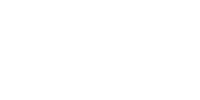

In [1]:
from PIL import Image, ImageDraw

img = Image.new('RGB', (200, 100), 'white')
img

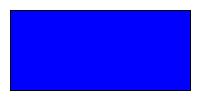

In [2]:
draw = ImageDraw.Draw(img)
draw.rectangle(
    [10, 10, 190, 90],
    outline='black',
    fill='blue',
)
img

### line() - 직선 그리기

**line(xy, fill=None, width=0)**
- `xy`: 시작점과 끝점 `[(x1, y1), (x2, y2)]` 또는 `[x1, y1, x2, y2]`
- `fill`: 선의 색상
- `width`: 선의 두께 (기본값 0은 1픽셀)

여러 점을 연결한 선분도 가능: `[(x1,y1), (x2,y2), (x3,y3), ...]`


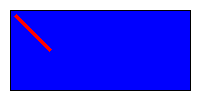

In [3]:
draw.line(
    [15,15,50,50],
    fill=(255,0,0), # red
    width=3,
)
img

### ellipse() - 타원/원 그리기

**ellipse(xy, fill=None, outline=None, width=1)**
- `xy`: 타원이 들어갈 사각형 영역 `[x1, y1, x2, y2]`
- 정사각형 영역에 그리면 원(circle)
- 직사각형 영역에 그리면 타원
- `fill`: 내부 채우기 색상
- `outline`: 테두리 색상
- `width`: 테두리 두께


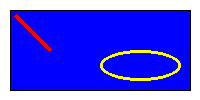

In [4]:
draw.ellipse(
    [100,50,180,80],
    fill=None,
    outline=(255,255,0),
    width=3,
)
img

### text() - 텍스트 그리기

**text(xy, text, fill=None, font=None, anchor=None)**
- `xy`: 텍스트 시작 위치 `(x, y)` 좌표
- `text`: 그릴 텍스트 문자열
- `fill`: 텍스트 색상 (기본값: 검은색)
- `font`: 폰트 객체 (`PIL.ImageFont`로 생성, None이면 기본 폰트)
- `anchor`: 텍스트 정렬 방식
  - `la`: left-ascender (기본값)
  - `lt`: left-top
  - `mm`: middle-middle
  - `ra`: right-ascender


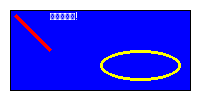

In [ ]:
# # 시스템에 나눔폰트 설치
# !apt-get update --quiet > /dev/null
# !apt-get install -y --quiet fonts-nanum > /dev/null

from PIL import Image, ImageDraw, ImageFont

# 설치된 나눔폰트 사용
font = ImageFont.truetype('/usr/share/fonts/truetype/nanum/NanumGothic.ttf', size=30)
draw.text(
    (50, 10),
    "안녕하세요!",
    fill='white',
    font=font,
)
img

### polygon() - 다각형 그리기

**polygon(xy, fill=None, outline=None, width=1)**
- `xy`: 다각형의 꼭짓점 좌표 리스트 `[(x1,y1), (x2,y2), (x3,y3), ...]`
- 마지막 점과 첫 번째 점이 자동으로 연결되어 닫힌 도형 생성
- 최소 3개 이상의 점 필요
- 삼각형, 화살표, 별모양 등 복잡한 도형 그리기에 사용
- `fill`: 내부 채우기 색상
- `outline`: 테두리 색상
- `width`: 테두리 두께


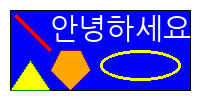

In [ ]:
# Draw a triangle
draw.polygon(
    [(10, 90), (50, 90), (30, 60)],
    outline='green',
    fill='yellow',
)

# Draw a pentagon
draw.polygon(
    [(60, 50), (80, 50), (90, 70), (70, 90), (50, 70)],
    outline='purple',
    fill='orange',
)

img

### arc() - 호(arc) 그리기

**arc(xy, start, end, fill=None, width=1)**
- `xy`: 호가 들어갈 사각형 영역 `[x1, y1, x2, y2]`
- `start`: 시작 각도 (도 단위, 0도는 3시 방향)
- `end`: 끝 각도 (도 단위)
- 각도는 시계방향(CW)으로 증가
  - 0도 = 오른쪽
  - 90도 = 아래쪽
  - 180도 = 왼쪽
  - 270도 = 위쪽
- `fill`: 호의 색상
- `width`: 호의 두께


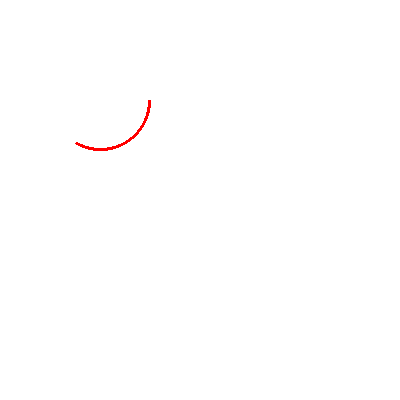

In [ ]:
img = Image.new('RGB', (400, 400), 'white')
draw = ImageDraw.Draw(img)

draw.arc(
    [50, 50, 150, 150],
    start=0,
    end=120,
    fill='red',
    width=3,
)

img